(0.25, 1.75)

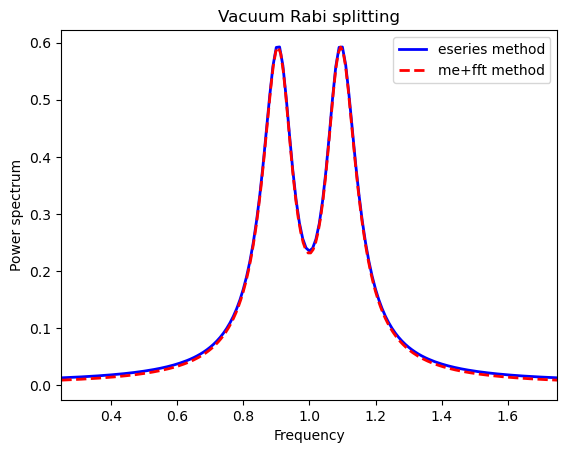

In [2]:
import numpy as np
from matplotlib import pyplot
import qutip
N = 4 # number of cavity fock states
wc = wa = 1.0 * 2 * np.pi # cavity and atom frequency
g = 0.1 * 2 * np.pi # coupling strength
kappa = 0.75 # cavity dissipation rate
gamma = 0.25 # atom dissipation rate
# Jaynes-Cummings Hamiltonian
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
sm = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
# collapse operators
n_th = 0.25
c_ops = [
np.sqrt(kappa * (1 + n_th)) * a,
np.sqrt(kappa * n_th) * a.dag(),
np.sqrt(gamma) * sm,
]
# calculate the correlation function using the mesolve solver, and then fft to
# obtain the spectrum. Here we need to make sure to evaluate the correlation
# function for a sufficient long time and sufficiently high sampling rate so
# that the discrete Fourier transform (FFT) captures all the features in the
# resulting spectrum.
tlist = np.linspace(0, 100, 5000)
corr = qutip.correlation_2op_1t(H, None, tlist, c_ops, a.dag(), a)
wlist1, spec1 = qutip.spectrum_correlation_fft(tlist, corr)
# calculate the power spectrum using spectrum, which internally uses essolve
# to solve for the dynamics (by default)
wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)
# plot the spectra
fig, ax = pyplot.subplots(1, 1)
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2, label='eseries method')
ax.plot(wlist2 / (2 * np.pi), spec2, 'r--', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))

# 1 fisrt part 比特加腔

(0.25, 1.75)

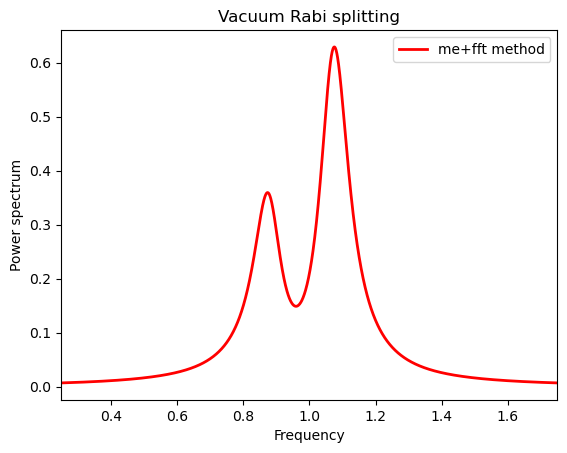

In [18]:
Na = 2
Nc = 4 # number of cavity fock states
wc =  1.0 * 2 * np.pi # cavity and atom frequency
wa = 6
g = 0.1 * 2 * np.pi # coupling strength
kappa = 0.75 # cavity dissipation rate
gamma = 0.25 # atom dissipation rate
# Jaynes-Cummings Hamiltonian
a = qutip.tensor(qutip.destroy(Nc), qutip.qeye(Na))
sm = qutip.tensor(qutip.qeye(Nc), qutip.destroy(Na))
H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())
# collapse operators
n_th = 0.2
c_ops = [
np.sqrt(kappa * (1 + n_th)) * a,
np.sqrt(kappa * n_th) * a.dag(),
np.sqrt(gamma) * sm,
]
wlist2 = np.linspace(0.25, 1.75, 2000) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)
# plot the spectra
fig, ax = pyplot.subplots(1, 1)
ax.plot(wlist2 / (2 * np.pi), spec2, 'r-', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))